In [1]:
import importlib
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import numpy as np

from CASutils import colormap_utils as mycolors
from CASutils import mapplot_utils as maps
from CASutils import colorbar_utils as cbars


importlib.reload(mycolors)
importlib.reload(maps)
importlib.reload(cbars)

<module 'CASutils.colorbar_utils' from '/home/islas/python/CASanalysis/CASutils/colorbar_utils.py'>

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [3]:
bestpath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_BEST.nc"
best = xr.open_dataset(bestpath)

In [4]:
#ghcndpath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_GHCND.nc"
#ghcnd = xr.open_dataset(ghcndpath)

In [5]:
isdpath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_ISD.nc"
isd=xr.open_dataset(isdpath)

In [6]:
era5path = "/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_ERA5.nc"
era5 = xr.open_dataset(era5path)

In [7]:
goga1path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_GOGA1.nc"
goga1 = xr.open_dataset(goga1path)
goga1varm = goga1.goga1var_djf.mean('Member')

In [8]:
goga2path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/TVAR_GOGA2.nc"
goga2 = xr.open_dataset(goga2path)
goga2varm = goga2.goga2var_djf.mean('Member')

In [9]:
lens1path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/LENS1_djf_var.nc"
lens1 = xr.open_dataset(lens1path)
lens1varm = lens1.djfvar.mean('member')

In [10]:
lens2path="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/LENS2_djf_var.nc"
lens2 = xr.open_dataset(lens2path)
lens2varm = lens2.djfvar.mean('member')

In [11]:
cityname=['Saskatoon','Toronto','Siderovsk']
citylon=[253.330, 280.617, 82.3139]
citylat=[52.1579, 43.6532, 66.5973]
for icity in np.arange(0,len(citylon),1):
    if (citylon[icity] > 180.):
        citylon[icity] = citylon[icity]-360.

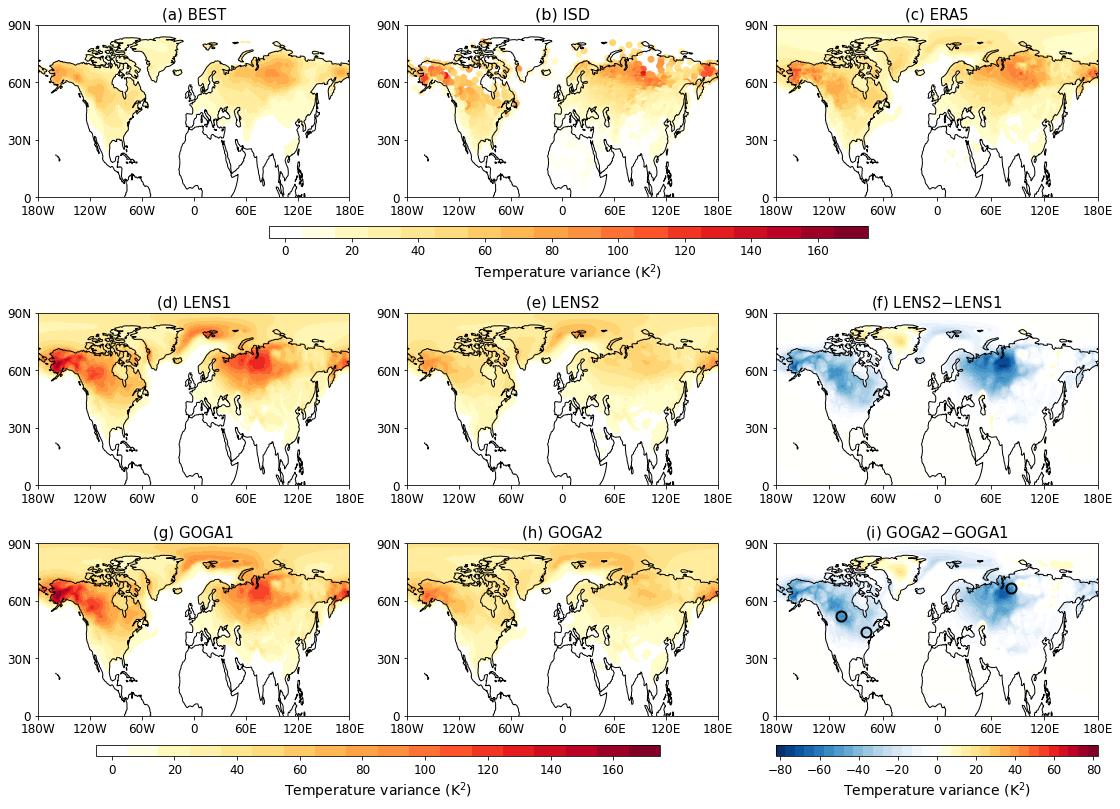

In [12]:
fig = plt.figure(figsize=(16,16))
ax1 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(best.bestvar), np.array(best.longitude), np.array(best.latitude), 10, -170, 170, '(a) BEST',0.05,0.32,0.8,0.95)

#ax2 = maps.contourmap_bothcontinents_scatter_nh_pos(fig, np.array(ghcnd.ghcndvar), np.array(ghcnd.lon), np.array(ghcnd.lat),10,-170,170,'(b) GHCN-Daily',
#                                                0.37,0.64,0.8,0.95)
ax2 = maps.contourmap_bothcontinents_scatter_nh_pos(fig, np.array(isd.isdvar), np.array(isd.lon), np.array(isd.lat), 10, -170, 170, '(b) ISD',0.37,0.64,0.8,0.95) 
ax3 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(era5.era5var), np.array(era5.lon), np.array(era5.lat), 10, -170, 170, '(c) ERA5', 0.69,0.97,0.8,0.95)
ax4 = cbars.plotcolorbar(fig, 10, -170, 170,'Temperature variance (K$^{2}$)',0.05+0.2,0.97-0.2,0.765,0.775,posneg='pos', ticks=([0,20,40,60,80,100,120,140,160]), fsize=12)

ax5 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(lens1varm), np.array(lens1varm.lon), np.array(lens1varm.lat), 10, -170, 170, '(d) LENS1', 0.05, 0.32, 0.55, 0.7)
ax6 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(lens2varm), np.array(lens2varm.lon), np.array(lens2varm.lat), 10, -170, 170, '(e) LENS2', 0.37, 0.64, 0.55, 0.7)
ax7 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(lens2varm)-np.array(lens1varm), np.array(lens1varm.lon), np.array(lens1varm.lat),
                                                5,-80,80,'(f) LENS2$-$LENS1', 0.69,0.97,0.55,0.7)

ax5 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(goga1varm), np.array(goga1varm.lon), np.array(goga1varm.lat), 10, -170, 170, '(g) GOGA1', 0.05, 0.32, 0.35, 0.5)
ax6 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(goga2varm), np.array(goga2varm.lon), np.array(goga2varm.lat), 10, -170, 170, '(h) GOGA2', 0.37, 0.64, 0.35, 0.5)
ax7 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(goga2varm)-np.array(goga1varm), np.array(goga1varm.lon), np.array(goga1varm.lat),
                                                5,-80,80,'(i) GOGA2$-$GOGA1', 0.69,0.97,0.35,0.5)
ax7 = plt.plot(citylon, citylat, "o", markersize=10, markerfacecolor='none', markeredgecolor='black', markeredgewidth=2)

ax8 = cbars.plotcolorbar(fig, 10, -170, 170,'Temperature variance (K$^{2}$)',0.05+0.05,0.64-0.05,0.315, 0.325, posneg='pos',ticks=([0,20,40,60,80,100,120,140,160]), fsize=12)
ax9 = cbars.plotcolorbar(fig, 5, -80, 80,'Temperature variance (K$^{2}$)',0.69,0.97,0.315,0.325, ticks=([-80,-60,-40,-20,0,20,40,60,80]), fsize=12)

In [13]:
fig.savefig(plotpath+"fig1.pdf", facecolor='white', bbox_inches='tight')